In [15]:
import pandas as pd
import numpy as np

data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "PlayTennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)

df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [16]:
class Node:
    def __init__(self, value):
        self.value = value
        self.children = {}
    def __repr__(self):
        if not self.children:
            return f"Node(value={self.value})"
        else:
            children_repr = {key: repr(child) for key, child in self.children.items()}
            return f"Node(value={self.value}, children={children_repr})"


In [17]:
import numpy as np

class C4_5:
    def __init__(self, data, label):
        self.data = data
        self.label = label
        self.tree = self.create_tree(data, None)

    def create_tree(self, data, parent):
        if data[self.label].nunique() == 1:
            return Node(data[self.label].iloc[0]) 

        root_column = self.determinate_root(data)
        root_node = Node(root_column)

        for val in data[root_column].unique():
            sub_data = data[data[root_column] == val].drop(root_column, axis=1)
            child_node = self.create_tree(sub_data, root_node)
            root_node.children[val] = child_node

        return root_node

    def determinate_root(self, data):
        h_s = self.calculate_dataset_entropy(data)
        gains = {}

        for col in data.columns[:-1]:
            entropy = self.calculate_weighted_entropy(col, data)
            gain = h_s - entropy
            gains[col] = gain

        max_key = max(gains, key=gains.get)
        return max_key

    def calculate_dataset_entropy(self, data):
        labels = data[self.label]
        num_of_records = len(labels)
        entropy = 0
        for v in labels.value_counts().to_dict().values():
            p = v / num_of_records
            entropy -= p * np.log2(p)
        return entropy

    def calculate_weighted_entropy(self, column, data):
        entropy = 0
        for attr in data[column].unique():
            num_of_attr = (data[column] == attr).sum()
            p_attr = num_of_attr / len(data)
            attr_data = data[data[column] == attr]
            h_attr = self.calculate_entropy(attr_data[self.label])
            entropy += p_attr * h_attr
        return entropy

    def calculate_entropy(self, data):
        num_of_records = len(data)
        entropy = 0
        for v in data.value_counts().to_dict().values():
            p = v / num_of_records
            entropy -= p * np.log2(p)
        return entropy



In [18]:
model = C4_5(df, "PlayTennis")

In [19]:
model.tree

Node(value=Outlook, children={'Sunny': "Node(value=Humidity, children={'High': 'Node(value=No)', 'Normal': 'Node(value=Yes)'})", 'Overcast': 'Node(value=Yes)', 'Rain': "Node(value=Wind, children={'Weak': 'Node(value=Yes)', 'Strong': 'Node(value=No)'})"})

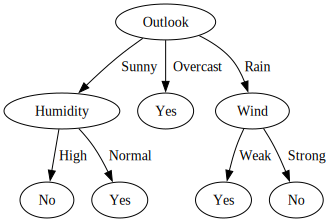

In [20]:
from graphviz import Digraph

def add_nodes_edges(dot, node, parent_label=None, edge_label=None):
    node_label = f"{id(node)}_{node.value}" 
    dot.node(node_label, label=node.value) 

    if parent_label:
        dot.edge(parent_label, node_label, label=edge_label) 

    for edge_label, child in node.children.items():
        add_nodes_edges(dot, child, parent_label=node_label, edge_label=edge_label)

def visualize_tree(root):
    dot = Digraph()
    add_nodes_edges(dot, root)
    return dot



visualize_tree(model.tree)
